<a href="https://colab.research.google.com/github/susuregis/Cota-o_de_moedas/blob/main/Cota%C3%A7%C3%A3o_de_moedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

In [6]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [7]:
if not os.path.exists('dados_cotacoes'):
 os.makedirs('dados_cotacoes')

In [8]:
data_fim = datetime.now().strftime('%m-%d-%Y')
data_inicio = (datetime.now() - timedelta(days=30)).strftime('%m-%d-%Y')

In [9]:
moedas = {
 'USD': 'Dólar Americano',
 'EUR': 'Euro',
 'GBP': 'Libra Esterlina',
 'JPY': 'Iene Japonês',
 'ARS': 'Peso Argentino'
}

In [10]:
dados_cotacoes = {}

In [11]:
for codigo, nome in moedas.items():
    print(f"Consultando {nome} ({codigo})...")

    # URL da API do Banco Central
    url = (
        f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/"
        f"CotacaoMoedaPeriodo(moeda=@moeda,dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?"
        f"@moeda='{codigo}'&@dataInicial='{data_inicio}'&@dataFinalCotacao='{data_fim}'"
        f"&$top=100&$format=json"
    )

    response = requests.get(url)

    if response.status_code == 200:
        dados = response.json()

        if 'value' in dados and dados['value']:
            # Extrair os dados de cotação
            cotacoes = []

            for item in dados['value']:
                cotacoes.append({
                    'data': item['dataHoraCotacao'],
                    'cotacao_compra': item['cotacaoCompra'],
                    'cotacao_venda': item['cotacaoVenda']
                })

            # Armazenar no dicionário
            dados_cotacoes[codigo] = {
                'nome': nome,
                'cotacoes': cotacoes
            }

            print(f" ✓ Obtidas {len(cotacoes)} cotações.")

        else:
            print(f" ✗ Nenhum dado de cotação encontrado.")

    else:
        print(f" ✗ Erro ao acessar a API. Código: {response.status_code}")


Consultando Dólar Americano (USD)...
 ✓ Obtidas 100 cotações.
Consultando Euro (EUR)...
 ✓ Obtidas 100 cotações.
Consultando Libra Esterlina (GBP)...
 ✓ Obtidas 100 cotações.
Consultando Iene Japonês (JPY)...
 ✓ Obtidas 100 cotações.
Consultando Peso Argentino (ARS)...
 ✗ Nenhum dado de cotação encontrado.


In [12]:
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])

        # Converter a coluna de data
        df['data'] = pd.to_datetime(df['data'])

        # Ordenar por data
        df = df.sort_values('data')

        # Salvar em CSV
        arquivo_csv = f'dados_cotacoes/cotacao_{codigo}.csv'
        df.to_csv(arquivo_csv, index=False, encoding='utf-8-sig')

        print(f" ✓ Arquivo '{arquivo_csv}' criado com sucesso!")


 ✓ Arquivo 'dados_cotacoes/cotacao_USD.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_EUR.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_GBP.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_JPY.csv' criado com sucesso!


 ✓ Gráfico 'dados_cotacoes/grafico_todas_moedas.png' criado com sucesso!


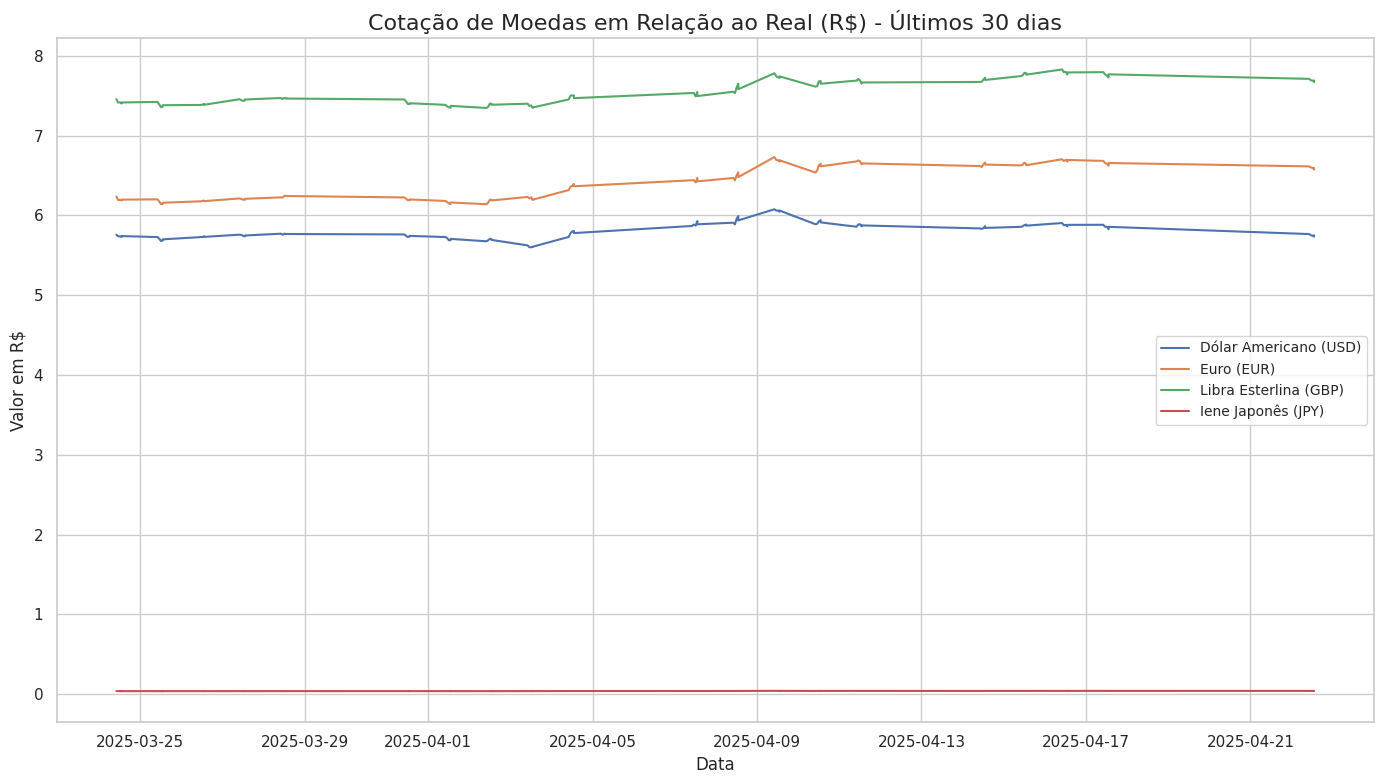

In [13]:
plt.figure(figsize=(14, 8))

for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')
        plt.plot(df['data'], df['cotacao_venda'], label=f"{dados['nome']} ({codigo})")

plt.title('Cotação de Moedas em Relação ao Real (R$) - Últimos 30 dias', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor em R$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

arquivo_grafico = 'dados_cotacoes/grafico_todas_moedas.png'
plt.savefig(arquivo_grafico, dpi=300)
print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


 ✓ Gráfico 'dados_cotacoes/grafico_USD.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_EUR.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_GBP.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_JPY.png' criado com sucesso!


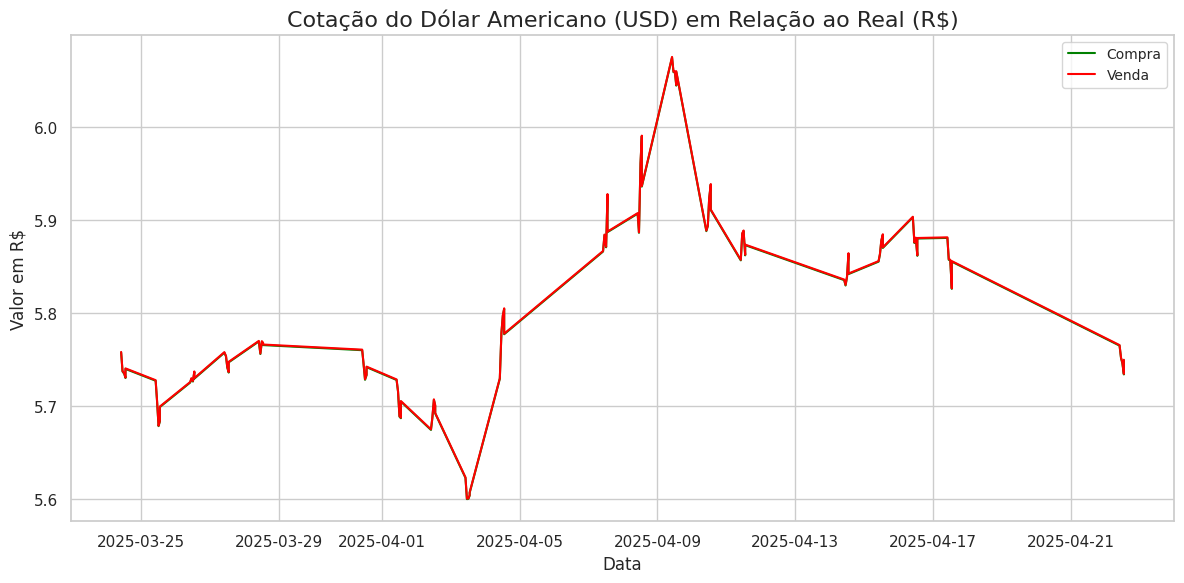

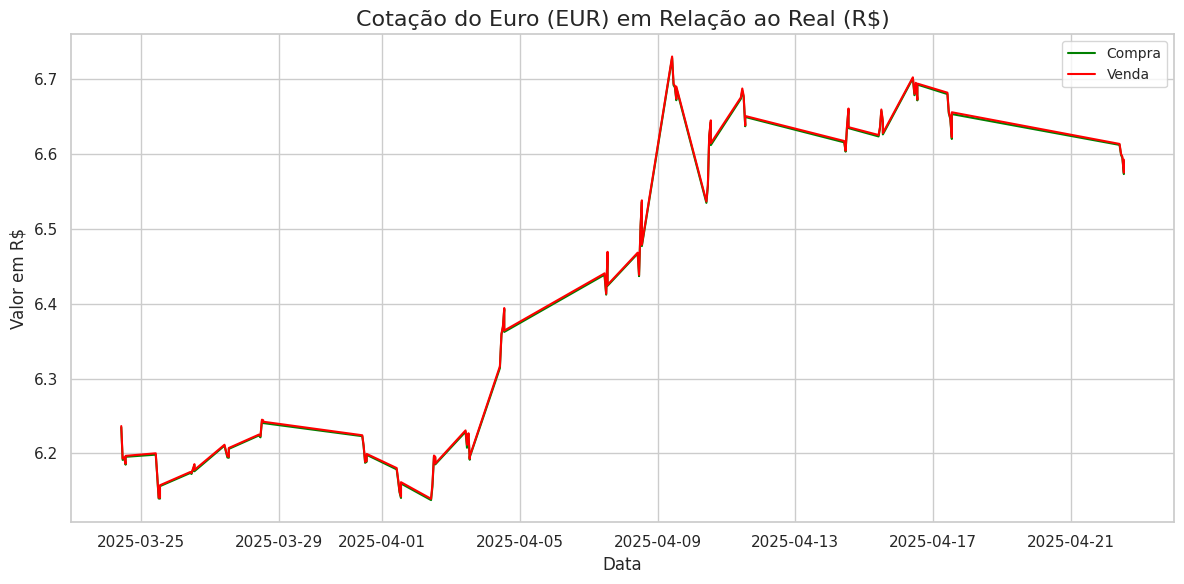

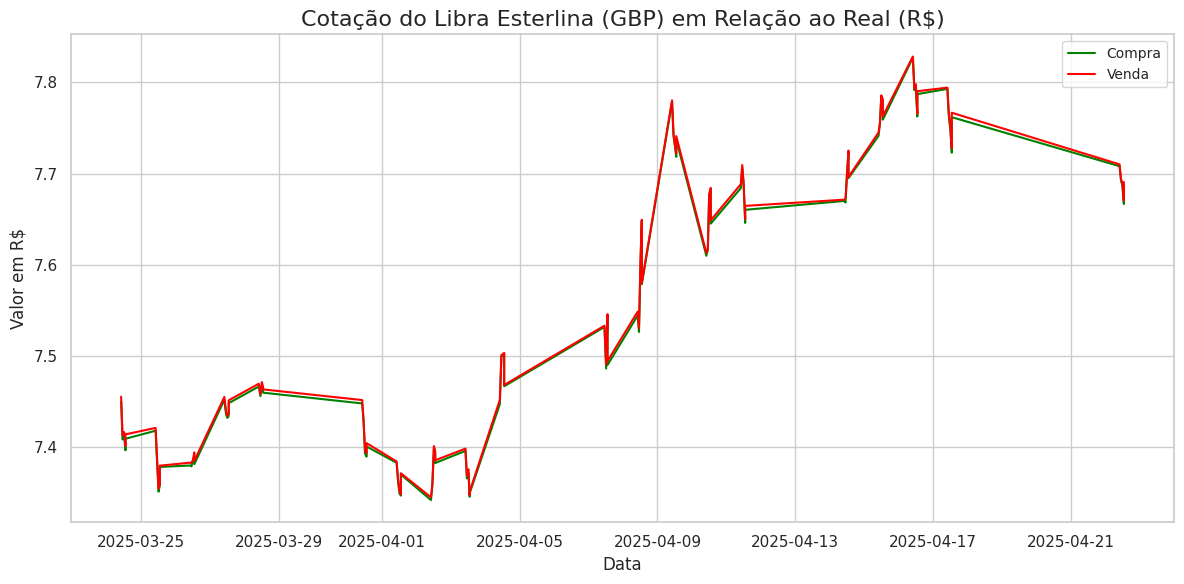

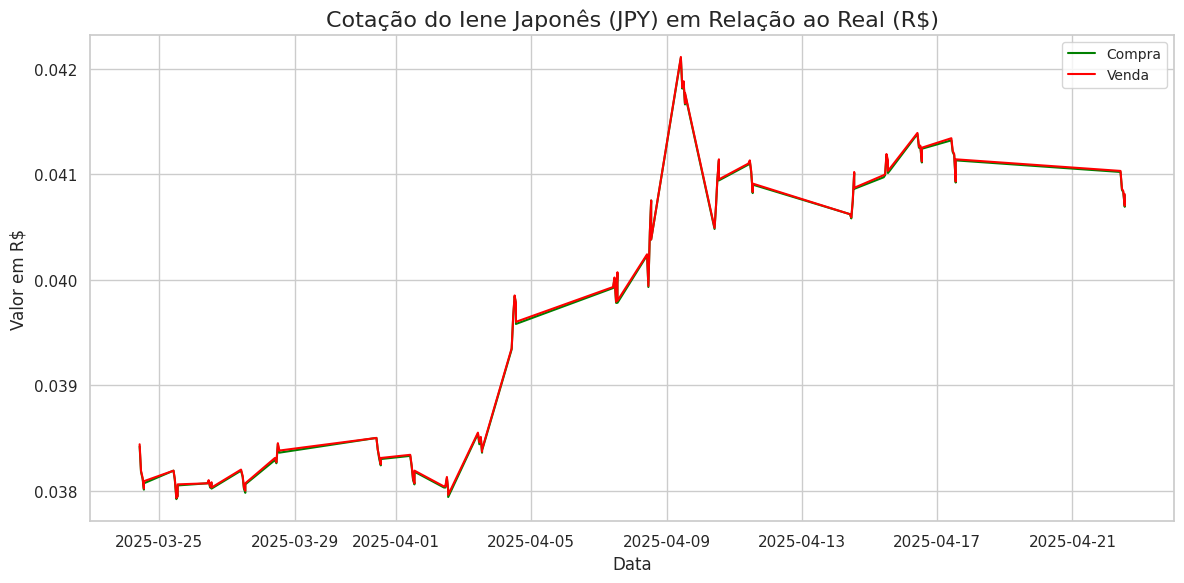

In [10]:
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        plt.figure(figsize=(12, 6))

        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')

        plt.plot(df['data'], df['cotacao_compra'], label='Compra', color='green', linestyle='-')
        plt.plot(df['data'], df['cotacao_venda'], label='Venda', color='red', linestyle='-')

        plt.title(f'Cotação do {dados["nome"]} ({codigo}) em Relação ao Real (R$)', fontsize=16)
        plt.xlabel('Data', fontsize=12)
        plt.ylabel('Valor em R$', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.tight_layout()

        arquivo_grafico = f'dados_cotacoes/grafico_{codigo}.png'
        plt.savefig(arquivo_grafico, dpi=300)
        print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


 ✓ Gráfico 'dados_cotacoes/grafico_variacao_percentual.png' criado com sucesso!


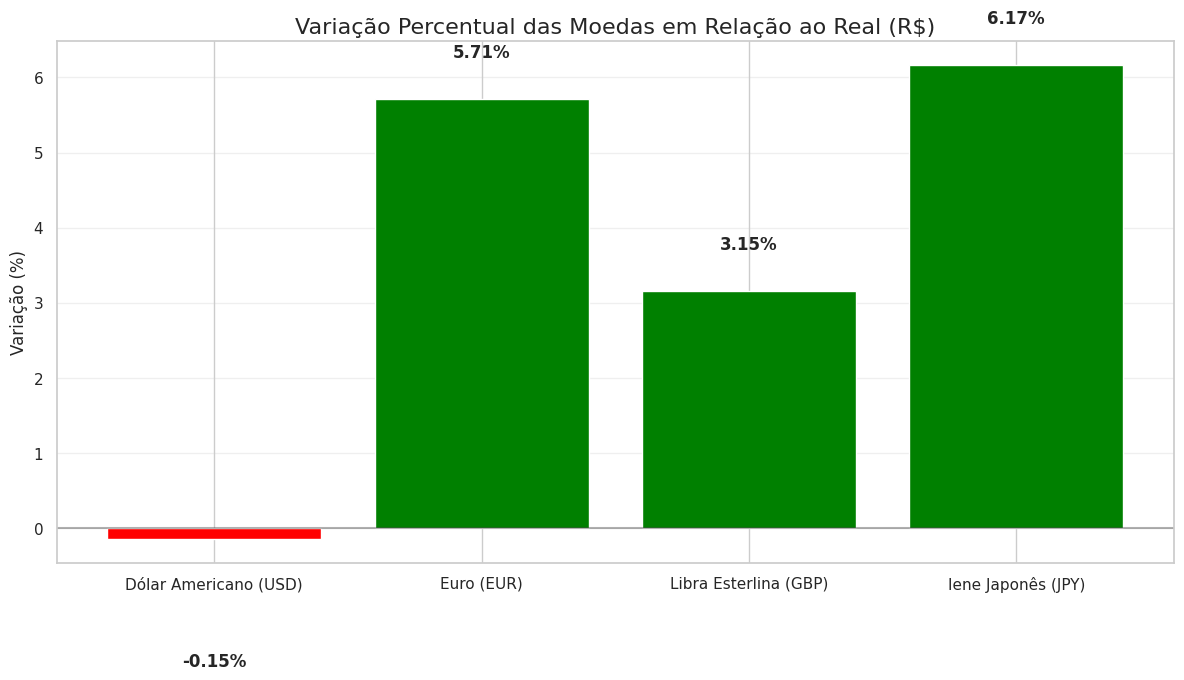

In [11]:
plt.figure(figsize=(12, 7))

variacoes = []
nomes = []

for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes'] and len(dados['cotacoes']) >= 2:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')

        # Calcular variação percentual
        primeiro_valor = df.iloc[0]['cotacao_venda']
        ultimo_valor = df.iloc[-1]['cotacao_venda']
        variacao_pct = ((ultimo_valor - primeiro_valor) / primeiro_valor) * 100

        variacoes.append(variacao_pct)
        nomes.append(f"{dados['nome']} ({codigo})")

# Criar cores baseadas na variação (positiva = verde, negativa = vermelha)
cores = ['green' if var >= 0 else 'red' for var in variacoes]

# Criar gráfico de barras
plt.bar(nomes, variacoes, color=cores)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Adicionar rótulos com os valores
for i, v in enumerate(variacoes):
    plt.text(i, v + (0.5 if v >= 0 else -1.5), f"{v:.2f}%",
             ha='center', va='bottom' if v >= 0 else 'top', fontweight='bold')

plt.title('Variação Percentual das Moedas em Relação ao Real (R$)', fontsize=16)
plt.ylabel('Variação (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

arquivo_grafico = 'dados_cotacoes/grafico_variacao_percentual.png'
plt.savefig(arquivo_grafico, dpi=300)
print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


In [13]:
print("\nResumo dos dados coletados:")

for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])  # <-- Conversão aqui

        print(f"\n{dados['nome']} ({codigo}):")
        print(f" - Período: {df['data'].min().strftime('%d/%m/%Y')} a {df['data'].max().strftime('%d/%m/%Y')}")
        print(f" - Cotação mínima: R$ {df['cotacao_venda'].min():.4f}")
        print(f" - Cotação máxima: R$ {df['cotacao_venda'].max():.4f}")
        print(f" - Cotação média: R$ {df['cotacao_venda'].mean():.4f}")



Resumo dos dados coletados:

Dólar Americano (USD):
 - Período: 24/03/2025 a 22/04/2025
 - Cotação mínima: R$ 5.6000
 - Cotação máxima: R$ 6.0759
 - Cotação média: R$ 5.8038

Euro (EUR):
 - Período: 24/03/2025 a 22/04/2025
 - Cotação mínima: R$ 6.1393
 - Cotação máxima: R$ 6.7303
 - Cotação média: R$ 6.4090

Libra Esterlina (GBP):
 - Período: 24/03/2025 a 22/04/2025
 - Cotação mínima: R$ 7.3452
 - Cotação máxima: R$ 7.8283
 - Cotação média: R$ 7.5495

Iene Japonês (JPY):
 - Período: 24/03/2025 a 22/04/2025
 - Cotação mínima: R$ 0.0379
 - Cotação máxima: R$ 0.0421
 - Cotação média: R$ 0.0396


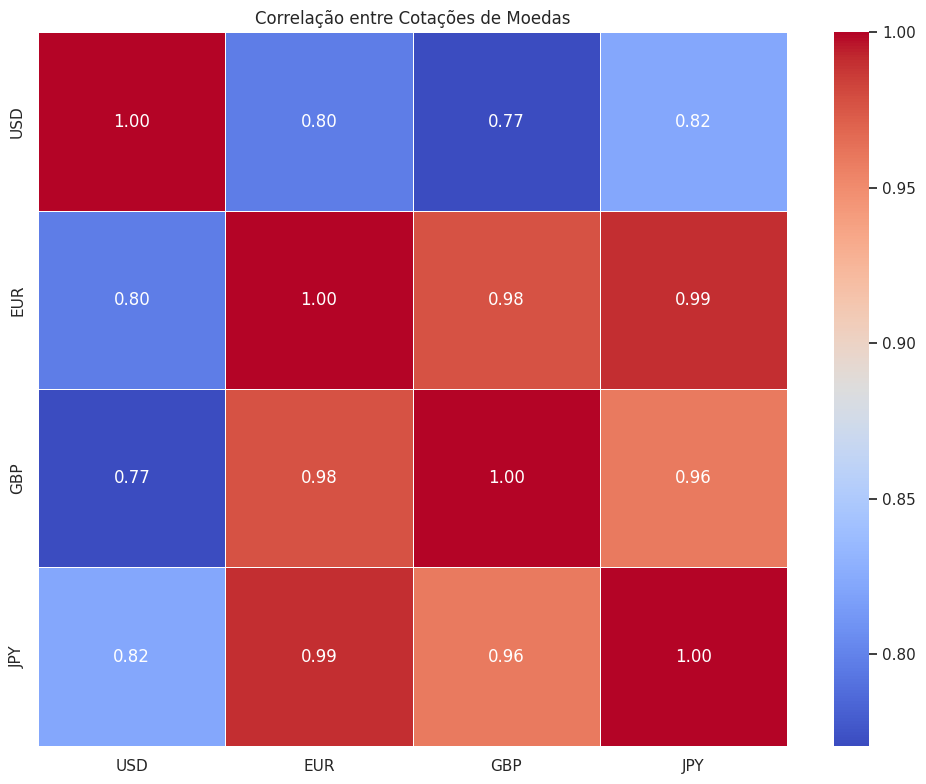

In [15]:
df_cotacoes = pd.DataFrame()

for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df_temp = pd.DataFrame(dados['cotacoes'])
        df_temp['data'] = pd.to_datetime(df_temp['data'])
        df_temp = df_temp.sort_values('data')
        df_temp = df_temp.set_index('data')

        # Renomeia a coluna para o código da moeda
        df_cotacoes[codigo] = df_temp['cotacao_venda']

# 2. Remover colunas que tenham muitos valores ausentes (opcional, mas ajuda a evitar erros)
df_cotacoes = df_cotacoes.dropna(axis=1, thresh=2)  # pelo menos 2 registros por moeda

# 3. Calcular a matriz de correlação
matriz_correlacao = df_cotacoes.corr()

# 4. Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Cotações de Moedas")
plt.tight_layout()

# 5. Salvar o gráfico
plt.savefig("dados_cotacoes/heatmap_correlacao_moedas.png", dpi=300)
plt.show()

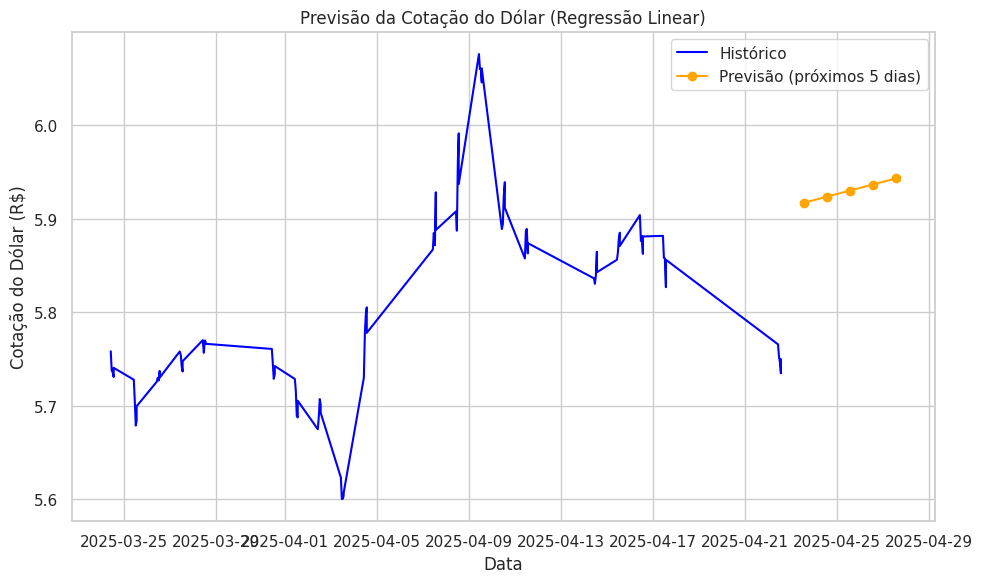

Previsão para 23/04/2025: R$ 5.9169
Previsão para 24/04/2025: R$ 5.9234
Previsão para 25/04/2025: R$ 5.9299
Previsão para 26/04/2025: R$ 5.9364
Previsão para 27/04/2025: R$ 5.9429


In [17]:
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import numpy as np


# Filtrar os dados do dólar (USD)
dados_usd = dados_cotacoes.get("USD")

if dados_usd and len(dados_usd['cotacoes']) >= 2:
    # Criar DataFrame
    df_usd = pd.DataFrame(dados_usd['cotacoes'])
    df_usd['data'] = pd.to_datetime(df_usd['data'])
    df_usd = df_usd.sort_values('data')

    # Converter datas para números (dias desde a primeira data)
    df_usd['dias'] = (df_usd['data'] - df_usd['data'].min()).dt.days
    X = df_usd[['dias']].values  # Feature
    y = df_usd['cotacao_venda'].values  # Target

    # Treinar modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Prever os próximos 5 dias
    ultimo_dia = df_usd['dias'].max()
    dias_futuros = np.array([[ultimo_dia + i] for i in range(1, 6)])
    previsoes = modelo.predict(dias_futuros)

    # Criar datas futuras
    datas_futuras = [df_usd['data'].max() + timedelta(days=i) for i in range(1, 6)]

    # Visualizar
    plt.figure(figsize=(10, 6))
    plt.plot(df_usd['data'], df_usd['cotacao_venda'], label='Histórico', color='blue')
    plt.plot(datas_futuras, previsoes, label='Previsão (próximos 5 dias)', color='orange', marker='o')
    plt.xlabel('Data')
    plt.ylabel('Cotação do Dólar (R$)')
    plt.title('Previsão da Cotação do Dólar (Regressão Linear)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.savefig("dados_cotacoes/previsao_dolar.png", dpi=300)
    plt.show()

    # Exibir previsões
    for data, valor in zip(datas_futuras, previsoes):
        print(f"Previsão para {data.strftime('%d/%m/%Y')}: R$ {valor:.4f}")
else:
    print("✗ Dados insuficientes para fazer previsão.")



In [18]:
import yfinance as yf

# Obter dados do Ibovespa (código: ^BVSP) de um determinado período
ibovespa = yf.download('^BVSP', start='2025-01-01', end='2025-04-22')

# Exibir as primeiras linhas dos dados
print(ibovespa.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker         ^BVSP     ^BVSP     ^BVSP     ^BVSP     ^BVSP
Date                                                        
2025-01-02  120125.0  120782.0  119120.0  120283.0   9373600
2025-01-03  118533.0  120356.0  118404.0  120125.0   9804400
2025-01-06  120022.0  120322.0  118534.0  118534.0   9685600
2025-01-07  121163.0  121713.0  120022.0  120022.0  11116400
2025-01-08  119625.0  121160.0  119351.0  121160.0  10230700


In [22]:
# Verificar as primeiras linhas e as colunas do DataFrame do Ibovespa
print(ibovespa.head())
print(ibovespa.columns)


Price      Close      High       Low      Open    Volume Date
Ticker     ^BVSP     ^BVSP     ^BVSP     ^BVSP     ^BVSP     
0       120125.0  120782.0  119120.0  120283.0   9373600    0
1       118533.0  120356.0  118404.0  120125.0   9804400    1
2       120022.0  120322.0  118534.0  118534.0   9685600    2
3       121163.0  121713.0  120022.0  120022.0  11116400    3
4       119625.0  121160.0  119351.0  121160.0  10230700    4
MultiIndex([( 'Close', '^BVSP'),
            (  'High', '^BVSP'),
            (   'Low', '^BVSP'),
            (  'Open', '^BVSP'),
            ('Volume', '^BVSP'),
            (  'Date',      '')],
           names=['Price', 'Ticker'])


In [23]:
# Resetando o índice para tornar as colunas mais acessíveis
ibovespa_reset = ibovespa.reset_index()

# Verificando o DataFrame após o reset do índice
print(ibovespa_reset.head())


Price  index     Close      High       Low      Open    Volume Date
Ticker           ^BVSP     ^BVSP     ^BVSP     ^BVSP     ^BVSP     
0          0  120125.0  120782.0  119120.0  120283.0   9373600    0
1          1  118533.0  120356.0  118404.0  120125.0   9804400    1
2          2  120022.0  120322.0  118534.0  118534.0   9685600    2
3          3  121163.0  121713.0  120022.0  120022.0  11116400    3
4          4  119625.0  121160.0  119351.0  121160.0  10230700    4


In [24]:
# Selecionando as colunas relevantes
df_ibovespa = ibovespa_reset[['Date', 'Close']]  # Usando a coluna 'Close'
df_ibovespa.rename(columns={'Close': 'Ibovespa'}, inplace=True)

# Exibindo as primeiras linhas para verificar a estrutura
print(df_ibovespa.head())


Price  Date  Ibovespa
Ticker          ^BVSP
0         0  120125.0
1         1  118533.0
2         2  120022.0
3         3  121163.0
4         4  119625.0


<ipython-input-24-b577b8f8b8d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibovespa.rename(columns={'Close': 'Ibovespa'}, inplace=True)


In [23]:
import yfinance as yf
from datetime import datetime, timedelta

ibov = yf.download('^BVSP', start=(datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))


if ibov.empty:
    print("✗ Dados insuficientes para fazer previsão.")
else:

    ibov_var = ((ibov['Close'].iloc[-1].item() - ibov['Close'].iloc[0].item()) / ibov['Close'].iloc[0].item()) * 100
    print(f"Variação do Ibovespa no período: {ibov_var:.2f}%")

[*********************100%***********************]  1 of 1 completed

Variação do Ibovespa no período: -0.65%


In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Baixar dados do Ibovespa
ibov = yf.download('^BVSP', start=(datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))

# Verificar se o DataFrame está vazio
if ibov.empty:
    print("✗ Dados insuficientes para fazer previsão.")
else:
    # Acessar os valores de fechamento como números simples usando .item()
    close_final = ibov['Close'].iloc[-1].item()
    close_inicial = ibov['Close'].iloc[0].item()

    # Calcular a variação percentual
    ibov_var = ((close_final - close_inicial) / close_inicial) * 100
    print(f"Variação do Ibovespa no período: {ibov_var:.2f}%")

[*********************100%***********************]  1 of 1 completed

Variação do Ibovespa no período: -0.65%


[*********************100%***********************]  1 of 1 completed


TypeError: unsupported format string passed to Series.__format__

In [17]:
pip install yagmail


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 8.1 MB/s eta 0:00:00


In [18]:
import yagmail


yag = yagmail.SMTP('susuregisestudo@gmail.com', 'suelenregina')

# Verificar variação do dólar
df = pd.read_csv('dados_cotacoes/cotacao_USD.csv')
variacao_usd = ((df['cotacao_venda'].iloc[-1] - df['cotacao_venda'].iloc[0]) / df['cotacao_venda'].iloc[0]) * 100

# Limite
limite = 5
if abs(variacao_usd) > limite:
    mensagem = f"A variação do Dólar ultrapassou o limite: {variacao_usd:.2f}%"
    yag.send('destinatario@gmail.com', 'Alerta de Variação de Moeda', mensagem)
    print("  Alerta enviado!")


In [29]:
pip install plotly dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [30]:
import plotly.express as px

# Exemplo com o DataFrame do dólar
df_usd = pd.read_csv('dados_cotacoes/cotacao_USD.csv')
df_usd['data'] = pd.to_datetime(df_usd['data'])

fig = px.line(df_usd, x='data', y='cotacao_venda', title='Dólar Americano (USD) - Cotação de Venda')
fig.show()


In [32]:
pip install dash --upgrade


In [41]:
import dash
import dash.dcc as dcc
import dash.html as html
import yfinance as yf
from dash.dependencies import Input, Output
from datetime import datetime, timedelta
import plotly.graph_objs as go

# Inicializa o aplicativo Dash
app = dash.Dash(__name__)

# Definindo a lista de moedas que o usuário pode selecionar
moedas = {
    'USD': 'Dólar Americano',
    'EUR': 'Euro',
    'GBP': 'Libra Esterlina',
    'JPY': 'Iene Japonês',
    'ARS': 'Peso Argentino'
}

# Função para obter dados de cotação da moeda
def obter_dados_moeda(moeda, data_inicio, data_fim):
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{moeda}BRL=X?period1={int(data_inicio.timestamp())}&period2={int(data_fim.timestamp())}&interval=1d&events=history"
    df = yf.download(f"{moeda}BRL=X", start=data_inicio, end=data_fim)
    df.reset_index(inplace=True)
    return df

# Layout do dashboard
app.layout = html.Div(children=[
    html.H1("Dashboard de Cotações de Moedas", style={'textAlign': 'center'}),

    # Dropdown para seleção de moeda
    html.Div([
        html.Label("Escolha a Moeda:"),
        dcc.Dropdown(
            id='moeda-dropdown',
            options=[{'label': nome, 'value': codigo} for codigo, nome in moedas.items()],
            value='USD',  # Moeda padrão
            style={'width': '50%'}
        )
    ], style={'padding': '20px'}),

    # Dropdown para selecionar o período
    html.Div([
        html.Label("Escolha o Período (dias):"),
        dcc.Slider(
            id='periodo-slider',
            min=7,
            max=90,
            step=1,
            value=30,  # Período padrão (últimos 30 dias)
            marks={i: f'{i} dias' for i in range(7, 91, 7)},
        )
    ], style={'padding': '20px'}),

    # Gráfico para exibição da cotação da moeda
    dcc.Graph(id='grafico-variacao'),
])

# Callback para atualizar o gráfico com base na moeda e período selecionado
@app.callback(
    Output('grafico-variacao', 'figure'),
    [Input('moeda-dropdown', 'value'),
     Input('periodo-slider', 'value')]
)
def atualizar_grafico(moeda_selecionada, periodo):
    # Definir as datas de início e fim com base no período selecionado
    data_fim = datetime.now()
    data_inicio = data_fim - timedelta(days=periodo)

    # Obter os dados da moeda
    df = obter_dados_moeda(moeda_selecionada, data_inicio, data_fim)

    # Calcular a variação percentual diária
    df['var_percentual'] = df['Close'].pct_change() * 100

    # Criar o gráfico
    trace = go.Scatter(
        x=df['Date'],
        y=df['var_percentual'],
        mode='lines+markers',
        name=f'Variação {moedas[moeda_selecionada]}',
        line=dict(color='blue')
    )

    figure = {
        'data': [trace],
        'layout': go.Layout(
            title=f'Variação Percentual de {moedas[moeda_selecionada]}',
            xaxis={'title': 'Data'},
            yaxis={'title': 'Variação (%)'},
            template='plotly_dark',
        )
    }
    return figure

# Rodar o servidor
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>